In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
import warnings
pd.set_option('display.expand_frame_repr', False)  # keep everything on one line
warnings.filterwarnings('ignore')

## Read in and understand data

In [2]:
df = pd.read_csv("/Users/emudr/Desktop/data/mental_health_diagnosis_treatment_.csv")
print(df.describe())
print(df.info())
print(df)

## EDA 
print(df.isna().sum())
print(df.duplicated().sum())
## No nulls, no duplicated, no outliers 


       Patient ID         Age  Symptom Severity (1-10)  Mood Score (1-10)  \
count  500.000000  500.000000               500.000000         500.000000   
mean   250.500000   38.708000                 7.478000           5.482000   
std    144.481833   12.712433                 1.706265           1.707486   
min      1.000000   18.000000                 5.000000           3.000000   
25%    125.750000   28.000000                 6.000000           4.000000   
50%    250.500000   38.000000                 8.000000           5.000000   
75%    375.250000   50.000000                 9.000000           7.000000   
max    500.000000   60.000000                10.000000           8.000000   

       Sleep Quality (1-10)  Physical Activity (hrs/week)  \
count            500.000000                    500.000000   
mean               6.472000                      5.216000   
std                1.668167                      2.829374   
min                4.000000                      1.000000   
2

## EDA 

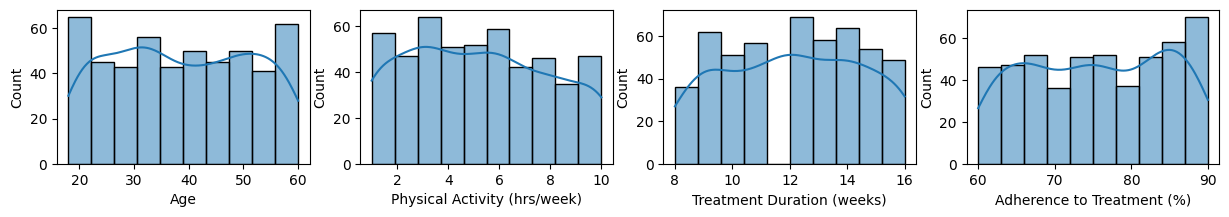

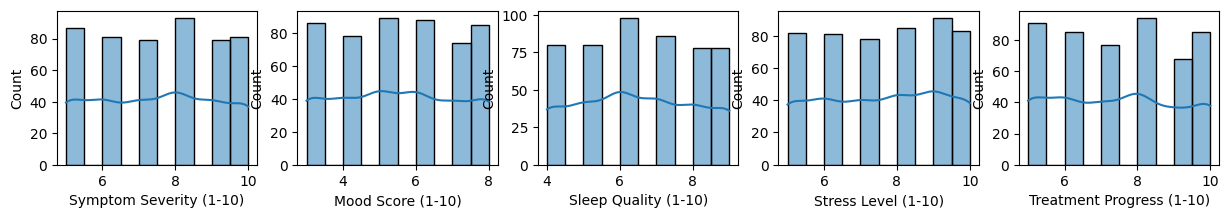

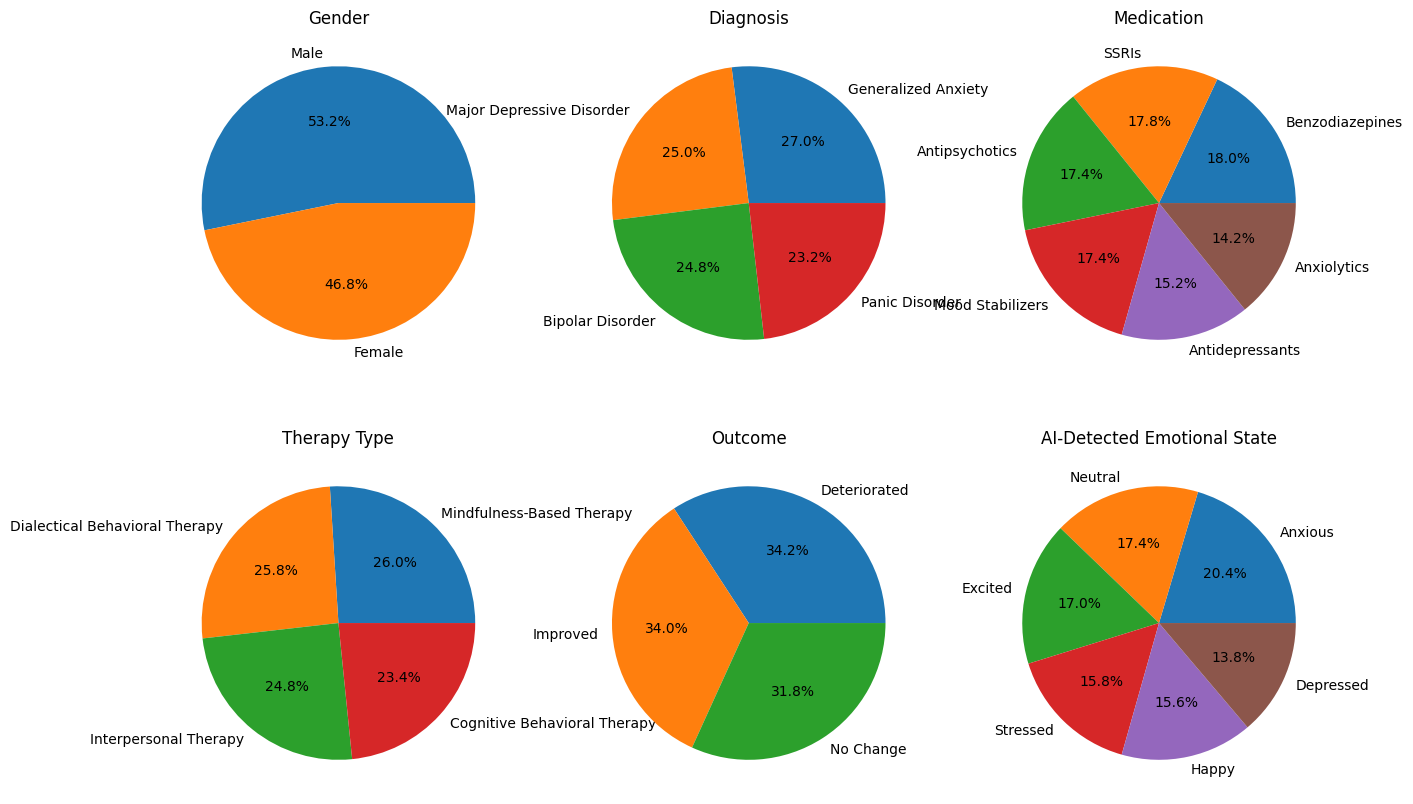

In [45]:
numeric_vars = ['Age', 'Physical Activity (hrs/week)', 'Treatment Duration (weeks)', 'Adherence to Treatment (%)']
ordinal_vars = ['Symptom Severity (1-10)', 'Mood Score (1-10)', 'Sleep Quality (1-10)', 'Stress Level (1-10)', 'Treatment Progress (1-10)']
categorical_vars = ['Gender', 'Diagnosis', 'Medication', 'Therapy Type', 'Outcome', 'AI-Detected Emotional State']


fig, axs = plt.subplots(1,4, figsize=(15,2)) 
axs = axs.flatten()
for i, col in enumerate(numeric_vars) : 
    sns.histplot(df[col], ax=axs[i], kde = True)
    axs[i].set_xlabel(col)
plt.show()

fig, axs = plt.subplots(1,5, figsize=(15,2))
axs = axs.flatten()
for i, col in enumerate(ordinal_vars): 
    sns.histplot(df[col], ax = axs[i], kde = True)
    axs[i].set_xlabel(col)
plt.show()

fig, axs = plt.subplots(2,3, figsize = (15,10))
axs = axs.flatten()
for i, col in enumerate(categorical_vars):
    value_counts = df[col].value_counts(dropna=False)
    axs[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axs[i].set_title(col)
plt.show()





Text(0.5, 1.0, 'Correlation Matrix')

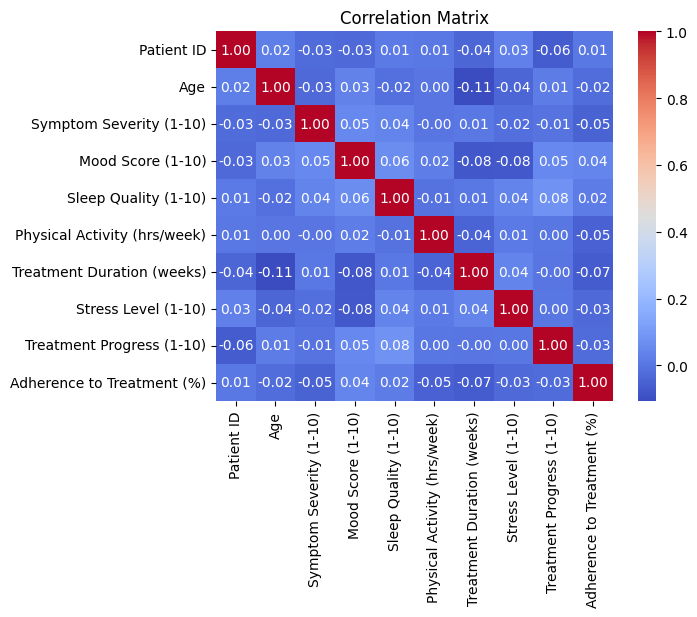

In [4]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm").set_title("Correlation Matrix")

## Which combination of treatment is best for MDD

Major Depressive Disorder


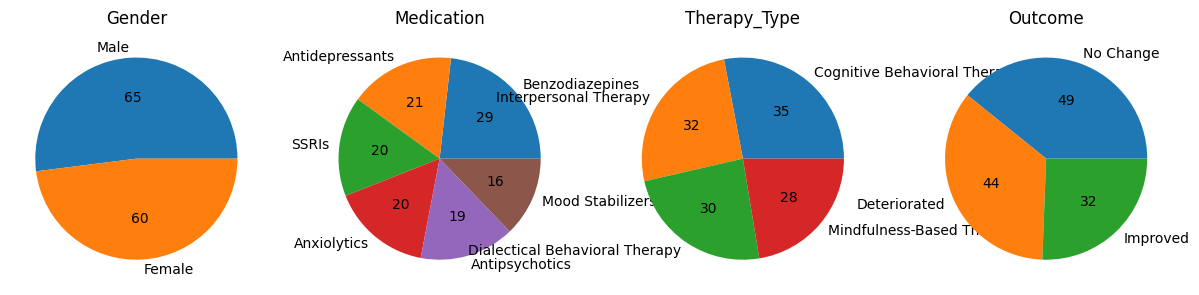

                                                                          columns  coefs
20         Medication[T.Antipsychotics]:Therapy_Type[T.Mindfulness-Based Therapy]   0.55
2                                                       Medication[T.Anxiolytics]   0.47
13  Medication[T.Mood Stabilizers]:Therapy_Type[T.Dialectical Behavioral Therapy]   0.41
14             Medication[T.SSRIs]:Therapy_Type[T.Dialectical Behavioral Therapy]   0.41
3                                                   Medication[T.Benzodiazepines]   0.39
Accuracy: 0.744
Generalized Anxiety


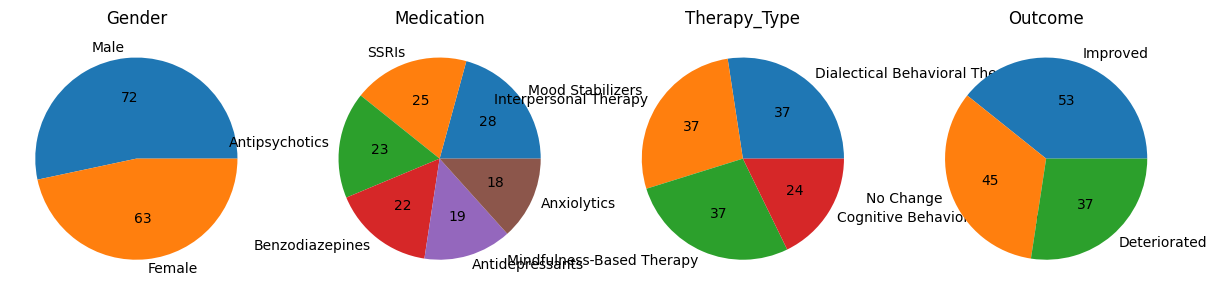

                                                                          columns  coefs
1                                                    Medication[T.Antipsychotics]   0.56
21            Medication[T.Anxiolytics]:Therapy_Type[T.Mindfulness-Based Therapy]   0.56
13  Medication[T.Mood Stabilizers]:Therapy_Type[T.Dialectical Behavioral Therapy]   0.36
12   Medication[T.Benzodiazepines]:Therapy_Type[T.Dialectical Behavioral Therapy]   0.34
9                                                               C(Gender)[T.Male]   0.31
Accuracy: 0.725925925925926
Panic Disorder


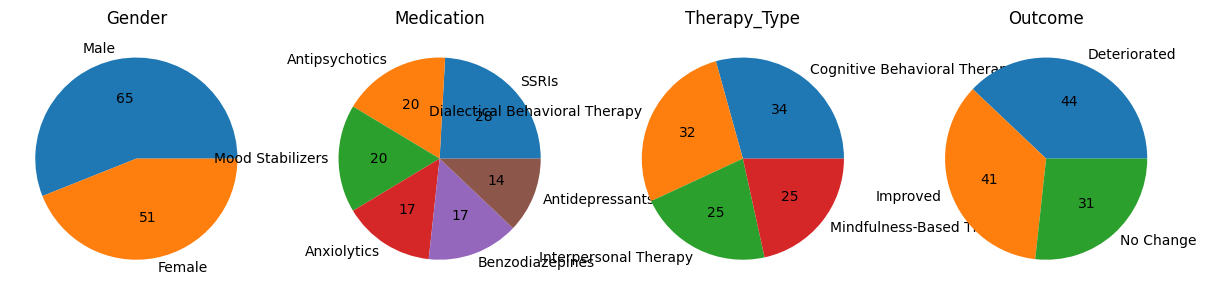

                                                                   columns  coefs
20  Medication[T.Antipsychotics]:Therapy_Type[T.Mindfulness-Based Therapy]   0.54
4                                           Medication[T.Mood Stabilizers]   0.45
24           Medication[T.SSRIs]:Therapy_Type[T.Mindfulness-Based Therapy]   0.34
14      Medication[T.SSRIs]:Therapy_Type[T.Dialectical Behavioral Therapy]   0.29
5                                                      Medication[T.SSRIs]   0.21
Accuracy: 0.7068965517241379
Bipolar Disorder


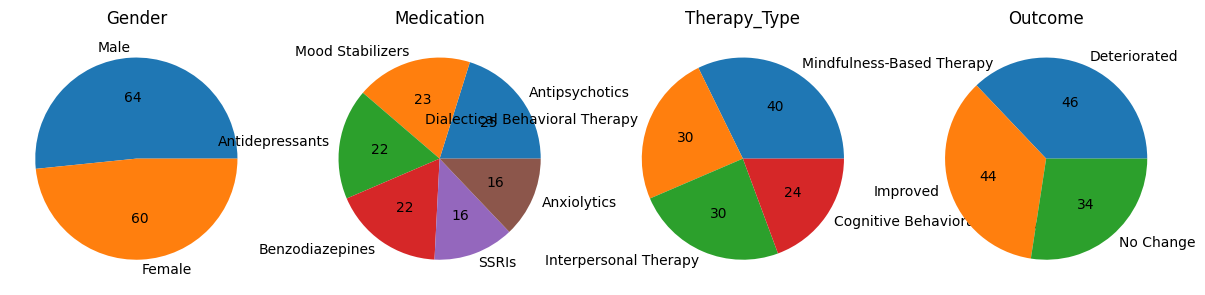

                                                                         columns  coefs
21           Medication[T.Anxiolytics]:Therapy_Type[T.Mindfulness-Based Therapy]   0.75
10   Medication[T.Antipsychotics]:Therapy_Type[T.Dialectical Behavioral Therapy]   0.47
19                     Medication[T.SSRIs]:Therapy_Type[T.Interpersonal Therapy]   0.45
12  Medication[T.Benzodiazepines]:Therapy_Type[T.Dialectical Behavioral Therapy]   0.41
6                                 Therapy_Type[T.Dialectical Behavioral Therapy]   0.25
Accuracy: 0.7016129032258065


In [39]:
disorder_list = ['Major Depressive Disorder', 'Generalized Anxiety', 'Panic Disorder', 'Bipolar Disorder']

for disorder in disorder_list : 
    
    mdd = df[df['Diagnosis']==disorder]
    mdd.rename(columns = {'Therapy Type' : 'Therapy_Type'}, inplace = True)
    
    
    categorical_vars = ['Gender', 'Medication', 'Therapy_Type', 'Outcome']
    fig, axs = plt.subplots(1,4, figsize = (15,10))
    axs = axs.flatten()
    for i, col in enumerate(categorical_vars):
        value_counts = mdd[col].value_counts(dropna=False)
        axs[i].pie(value_counts, labels=value_counts.index,  autopct=lambda p: f'{int(round(p * sum(value_counts) / 100))}')
        axs[i].set_title(col)
    print(disorder)
    plt.show()
    
    
    # Convert to categorical
    mdd['Outcome'] = mdd['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)
    mdd['Medication'] = mdd['Medication'].astype('category')
    mdd['Therapy_Type'] = mdd['Therapy_Type'].astype('category')
    
    # Create design matrices
    formula = '''Outcome ~ Medication * Therapy_Type
                 + Age 
                 + Q("Symptom Severity (1-10)") 
                 + Q("Stress Level (1-10)") 
                 + Q("Sleep Quality (1-10)") 
                 + Q("Physical Activity (hrs/week)") 
                 + C(Gender)
                 + Q("Treatment Duration (weeks)") 
                 + Q("Adherence to Treatment (%)")
                 '''
    
    y, X = dmatrices(formula, data=mdd, return_type='dataframe')
    model = LogisticRegression(multi_class='multinomial', max_iter = 1000)
    model.fit(X, y["Outcome"])
    output_df = pd.DataFrame()
    output_df['columns'] = X.columns
    output_df['coefs'] = model.coef_[0].round(2)
    print(output_df.sort_values(by=['coefs'], ascending = False).head(5))
    print("Accuracy:", model.score(X, y.values.ravel()))
    


Major Depressive Disorder


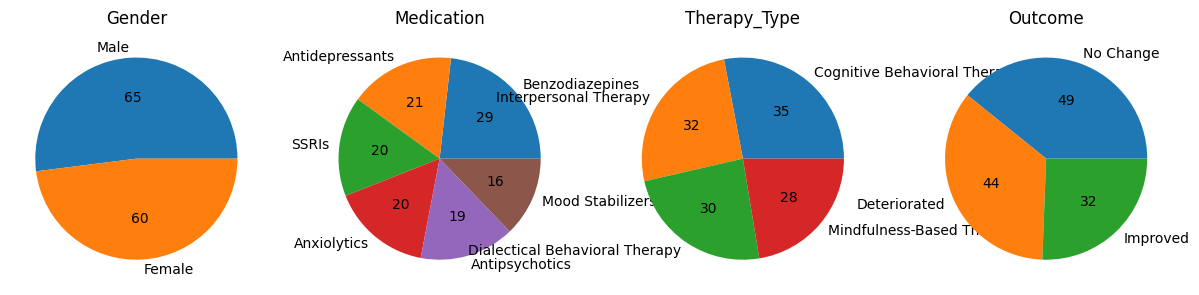

                           columns  coefs
4   Medication[T.Mood Stabilizers]   0.42
2        Medication[T.Anxiolytics]   0.29
3    Medication[T.Benzodiazepines]   0.26
1     Medication[T.Antipsychotics]   0.21
10       Q("Sleep Quality (1-10)")   0.04
Accuracy: 0.736
Generalized Anxiety


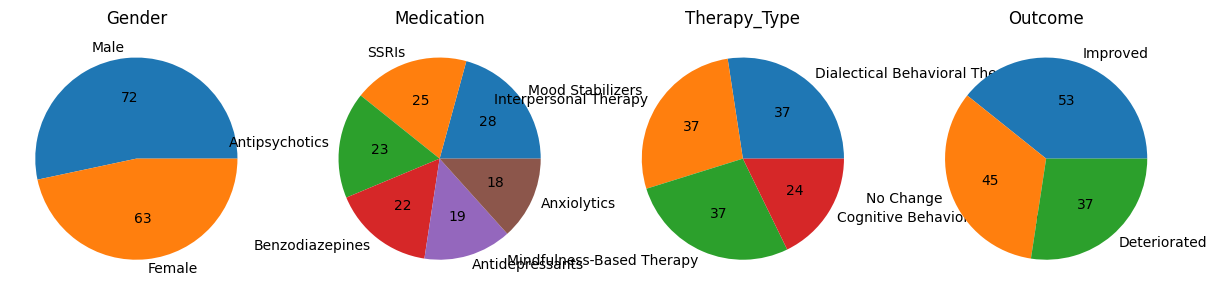

                          columns  coefs
6               C(Gender)[T.Male]   0.35
3   Medication[T.Benzodiazepines]   0.25
1    Medication[T.Antipsychotics]   0.22
4  Medication[T.Mood Stabilizers]   0.07
8    Q("Symptom Severity (1-10)")   0.04
Accuracy: 0.7111111111111111
Panic Disorder


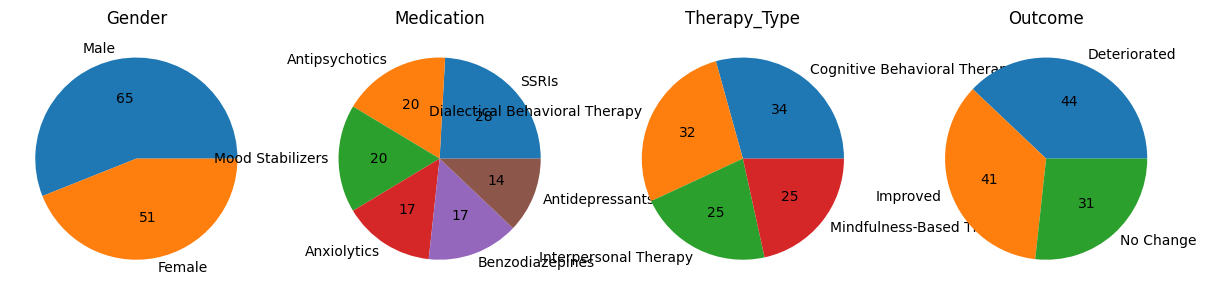

                           columns  coefs
4   Medication[T.Mood Stabilizers]   0.43
5              Medication[T.SSRIs]   0.40
3    Medication[T.Benzodiazepines]   0.09
10       Q("Sleep Quality (1-10)")   0.09
2        Medication[T.Anxiolytics]   0.06
Accuracy: 0.7068965517241379
Bipolar Disorder


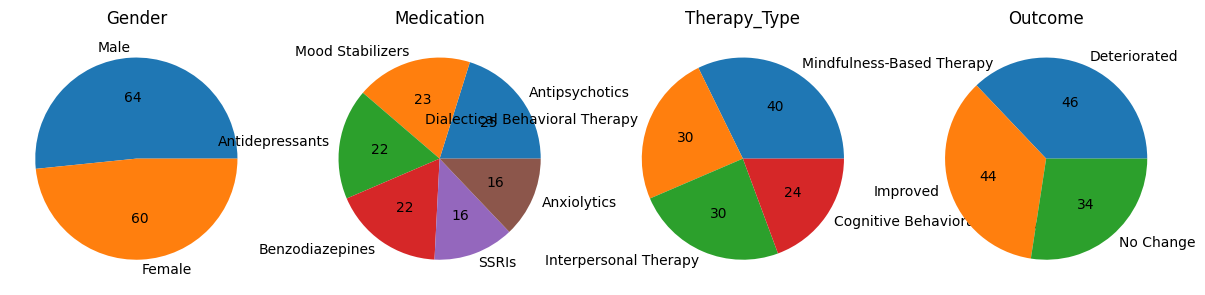

                        columns  coefs
6             C(Gender)[T.Male]   0.24
2     Medication[T.Anxiolytics]   0.06
5           Medication[T.SSRIs]   0.02
8  Q("Symptom Severity (1-10)")   0.01
9      Q("Stress Level (1-10)")   0.01
Accuracy: 0.6451612903225806


In [46]:
disorder_list = ['Major Depressive Disorder', 'Generalized Anxiety', 'Panic Disorder', 'Bipolar Disorder']

for disorder in disorder_list : 
    
    mdd = df[df['Diagnosis']==disorder]
    mdd.rename(columns = {'Therapy Type' : 'Therapy_Type'}, inplace = True)
    
    
    categorical_vars = ['Gender', 'Medication', 'Therapy_Type', 'Outcome']
    fig, axs = plt.subplots(1,4, figsize = (15,10))
    axs = axs.flatten()
    for i, col in enumerate(categorical_vars):
        value_counts = mdd[col].value_counts(dropna=False)
        axs[i].pie(value_counts, labels=value_counts.index,  autopct=lambda p: f'{int(round(p * sum(value_counts) / 100))}')
        axs[i].set_title(col)
    print(disorder)
    plt.show()
    
    
    # Convert to categorical
    mdd['Outcome'] = mdd['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)
    mdd['Medication'] = mdd['Medication'].astype('category')
    mdd['Therapy_Type'] = mdd['Therapy_Type'].astype('category')
    
    # Create design matrices
    formula = '''Outcome ~ Medication
                 + Age 
                 + Q("Symptom Severity (1-10)") 
                 + Q("Stress Level (1-10)") 
                 + Q("Sleep Quality (1-10)") 
                 + Q("Physical Activity (hrs/week)") 
                 + C(Gender)
                 + Q("Treatment Duration (weeks)") 
                 + Q("Adherence to Treatment (%)")
                 '''
    
    y, X = dmatrices(formula, data=mdd, return_type='dataframe')
    model = LogisticRegression(multi_class='multinomial', max_iter = 1000)
    model.fit(X, y["Outcome"])
    output_df = pd.DataFrame()
    output_df['columns'] = X.columns
    output_df['coefs'] = model.coef_[0].round(2)
    print(output_df.sort_values(by=['coefs'], ascending = False).head(3))
    print("Accuracy:", model.score(X, y.values.ravel()))
    


Major Depressive Disorder


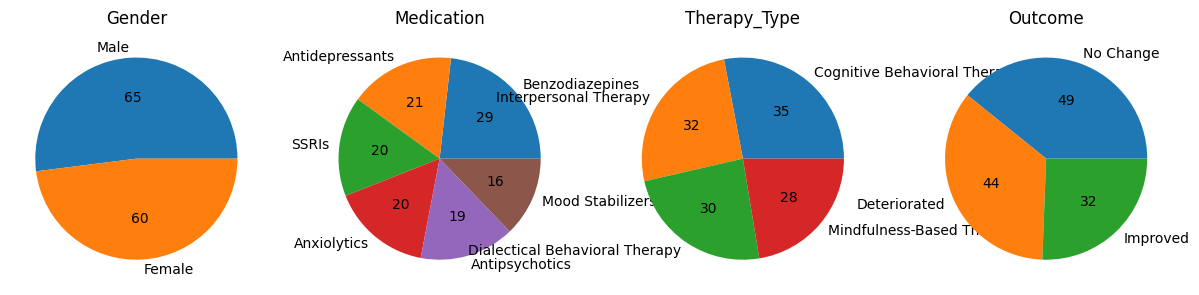

                            columns  coefs
10  Q("Treatment Duration (weeks)")   0.03
Accuracy: 0.744
Generalized Anxiety


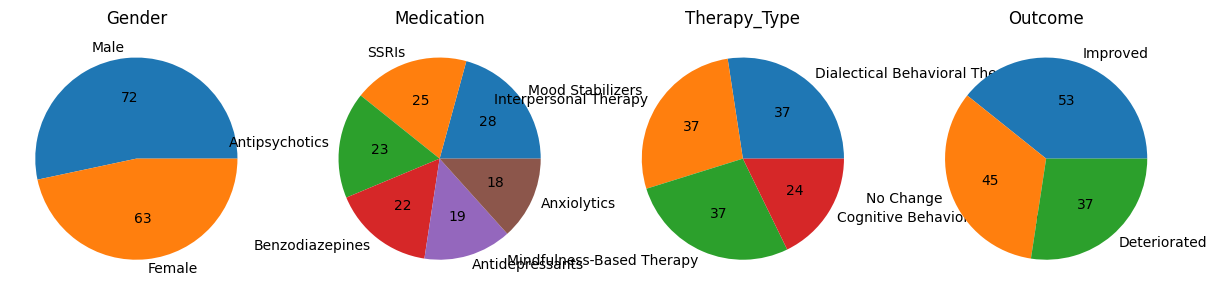

             columns  coefs
4  C(Gender)[T.Male]   0.29
Accuracy: 0.6518518518518519
Panic Disorder


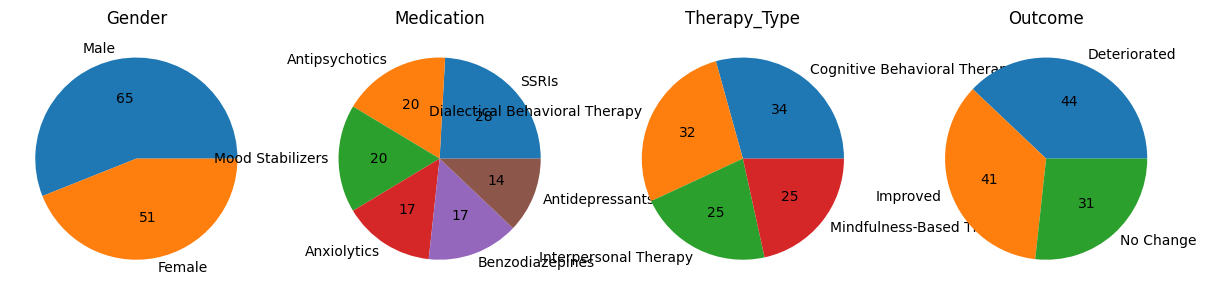

                     columns  coefs
8  Q("Sleep Quality (1-10)")   0.11
Accuracy: 0.6724137931034483
Bipolar Disorder


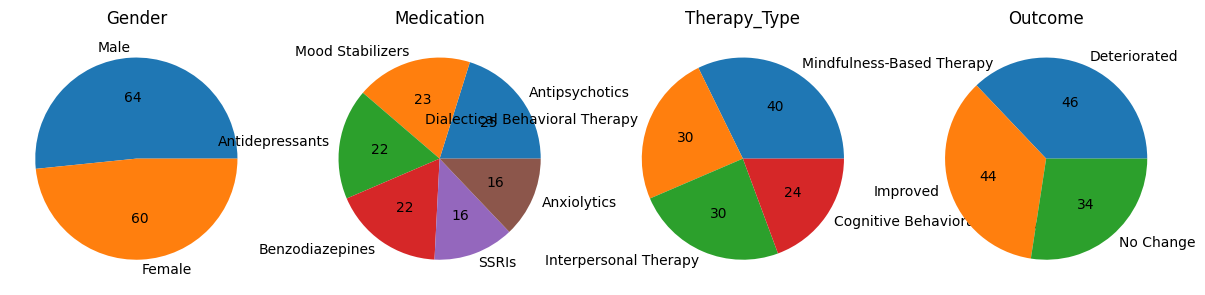

                                          columns  coefs
1  Therapy_Type[T.Dialectical Behavioral Therapy]   0.26
Accuracy: 0.6693548387096774


In [49]:
disorder_list = ['Major Depressive Disorder', 'Generalized Anxiety', 'Panic Disorder', 'Bipolar Disorder']

for disorder in disorder_list : 
    
    mdd = df[df['Diagnosis']==disorder]
    mdd.rename(columns = {'Therapy Type' : 'Therapy_Type'}, inplace = True)
    
    
    categorical_vars = ['Gender', 'Medication', 'Therapy_Type', 'Outcome']
    fig, axs = plt.subplots(1,4, figsize = (15,10))
    axs = axs.flatten()
    for i, col in enumerate(categorical_vars):
        value_counts = mdd[col].value_counts(dropna=False)
        axs[i].pie(value_counts, labels=value_counts.index,  autopct=lambda p: f'{int(round(p * sum(value_counts) / 100))}')
        axs[i].set_title(col)
    print(disorder)
    plt.show()
    
    
    # Convert to categorical
    mdd['Outcome'] = mdd['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)
    mdd['Medication'] = mdd['Medication'].astype('category')
    mdd['Therapy_Type'] = mdd['Therapy_Type'].astype('category')
    
    # Create design matrices
    formula = '''Outcome ~ Therapy_Type
                 + Age 
                 + Q("Symptom Severity (1-10)") 
                 + Q("Stress Level (1-10)") 
                 + Q("Sleep Quality (1-10)") 
                 + Q("Physical Activity (hrs/week)") 
                 + C(Gender)
                 + Q("Treatment Duration (weeks)") 
                 + Q("Adherence to Treatment (%)")
                 '''
    
    y, X = dmatrices(formula, data=mdd, return_type='dataframe')
    model = LogisticRegression(multi_class='multinomial', max_iter = 1000)
    model.fit(X, y["Outcome"])
    output_df = pd.DataFrame()
    output_df['columns'] = X.columns
    output_df['coefs'] = model.coef_[0].round(2)
    print(output_df.sort_values(by=['coefs'], ascending = False).head(1))
    print("Accuracy:", model.score(X, y.values.ravel()))
    
